In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import warnings
import folium
import json

In [2]:
warnings.filterwarnings('ignore')

plt.rcParams["font.family"] = "Malgun Gothic"  # For Windows
plt.rcParams["font.size"] = 12
plt.rcParams["figure.figsize"] = (8,4)
print(plt.rcParams["font.family"])

mpl.rcParams["axes.unicode_minus"] = False

['Malgun Gothic']


In [3]:
pop_1 = pd.read_csv("datas/population_ages_N.csv", encoding="cp949")
pop_1.columns = (
    pop_1.columns.str.replace('2025년03월_', '', regex=False)
)
pop_1

,행정구역,계_총인구수,계_연령구간인구수,계_0~9세,계_10~19세,계_20~29세,계_30~39세,계_40~49세,계_50~59세,계_60~69세,...,여_10~19세,여_20~29세,여_30~39세,여_40~49세,여_50~59세,여_60~69세,여_70~79세,여_80~89세,여_90~99세,여_100세 이상
0,경기도 남양주시 (4136000000),"730,717","730,717","48,970","78,586","78,898","84,304","122,729","130,060","101,873",...,"38,306","38,354","41,932","62,132","64,323","51,616","30,108","15,602","2,879",93
1,경기도 남양주시 와부읍(4136025000),"57,980","57,980","2,746","6,399","6,588","5,466","8,598","11,277","8,688",...,"3,122","3,114","2,632","4,613","5,716","4,389","2,831","1,509",271,8
2,경기도 남양주시 진접읍(4136025300),"95,246","95,246","5,688","11,264","10,477","9,746","15,372","17,630","13,653",...,"5,452","4,906","4,666","7,856","8,483","6,802","3,974","2,168",379,11
3,경기도 남양주시 화도읍(4136025600),"63,618","63,618","3,238","6,490","7,083","6,103","10,246","12,538","9,638",...,"3,139","3,345","2,894","5,140","6,103","4,856","3,005","1,555",263,10
4,경기도 남양주시 화도읍동부출장소(4136025700),"12,964","12,964",956,"1,372","1,169","1,413","2,247","2,236","2,030",...,677,562,695,"1,083","1,119","1,006",491,268,82,1
5,경기도 남양주시 화도읍남부출장소(4136025800),"35,509","35,509","2,453","4,216","3,601","3,616","6,349","6,666","4,688",...,"1,983","1,686","1,810","3,255","3,214","2,343","1,408",738,115,4
6,경기도 남양주시 진건읍(4136025900),"20,058","20,058",578,"1,369","2,172","2,001","2,266","3,997","4,318",...,628,"1,008",852,"1,075","1,910","2,028","1,124",660,151,7
7,경기도 남양주시 오남읍(4136026200),"50,965","50,965","2,318","5,481","6,411","4,816","7,685","10,798","7,192",...,"2,631","3,082","2,284","3,888","5,249","3,575","2,211","1,290",229,4
8,경기도 남양주시 퇴계원읍(4136026500),"26,742","26,742","1,040","2,134","3,032","2,980","3,294","5,032","5,280",...,"1,035","1,432","1,393","1,622","2,569","2,722","1,340",741,120,2
9,경기도 남양주시 별내면(4136031000),"18,013","18,013",693,"1,586","1,977","1,508","2,347","3,731","3,110",...,771,921,737,"1,133","1,826","1,549","1,024",601,110,4


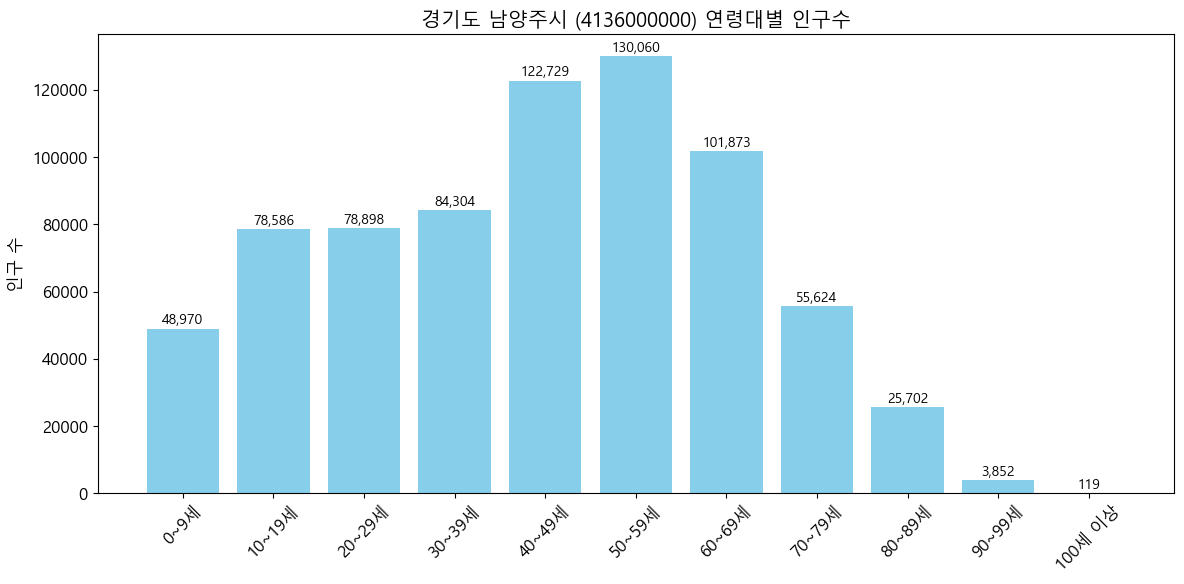

In [4]:
age_cols = pop_1.columns[3:14]
age_values = pop_1.iloc[0, 3:14].apply(lambda x: int(str(x).replace(',', '')) if isinstance(x, str) else x)
x_labels = [col.replace("계_", "") for col in age_cols]

plt.figure(figsize=(12, 6))
bars = plt.bar(x_labels, age_values, color='skyblue')
plt.xticks(rotation=45)
plt.title(f"{pop_1.iloc[0, 0]} 연령대별 인구수")
plt.ylabel("인구 수")

for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height + 400,  # 막대보다 약간 위에
        f'{height:,}',  # 천 단위 쉼표 표시
        ha='center', va='bottom', fontsize=10
    )

plt.tight_layout()
plt.show()

In [5]:
pop_2 = pd.read_csv("datas/population_all_N.csv", encoding="cp949")
pop_2.columns = (
    pop_2.columns.str.replace('2025년03월_', '', regex=False)
)
pop_2

,행정구역,총인구수,세대수,세대당 인구,남자 인구수,여자 인구수,남여 비율
0,경기도 남양주시 (4136000000),"730,717","307,572",2.38,"361,553","369,164",0.98
1,경기도 남양주시 와부읍(4136025000),"57,980","22,872",2.53,"28,471","29,509",0.96
2,경기도 남양주시 진접읍(4136025300),"95,246","39,862",2.39,"47,822","47,424",1.01
3,경기도 남양주시 화도읍(4136025600),"63,618","28,510",2.23,"31,695","31,923",0.99
4,경기도 남양주시 화도읍동부출장소(4136025700),"12,964","5,607",2.31,"6,540","6,424",1.02
5,경기도 남양주시 화도읍남부출장소(4136025800),"35,509","14,501",2.45,"17,779","17,730",1.00
6,경기도 남양주시 진건읍(4136025900),"20,058","9,667",2.07,"10,348","9,710",1.07
7,경기도 남양주시 오남읍(4136026200),"50,965","21,710",2.35,"25,399","25,566",0.99
8,경기도 남양주시 퇴계원읍(4136026500),"26,742","11,464",2.33,"13,251","13,491",0.98
9,경기도 남양주시 별내면(4136031000),"18,013","8,112",2.22,"9,000","9,013",1.00


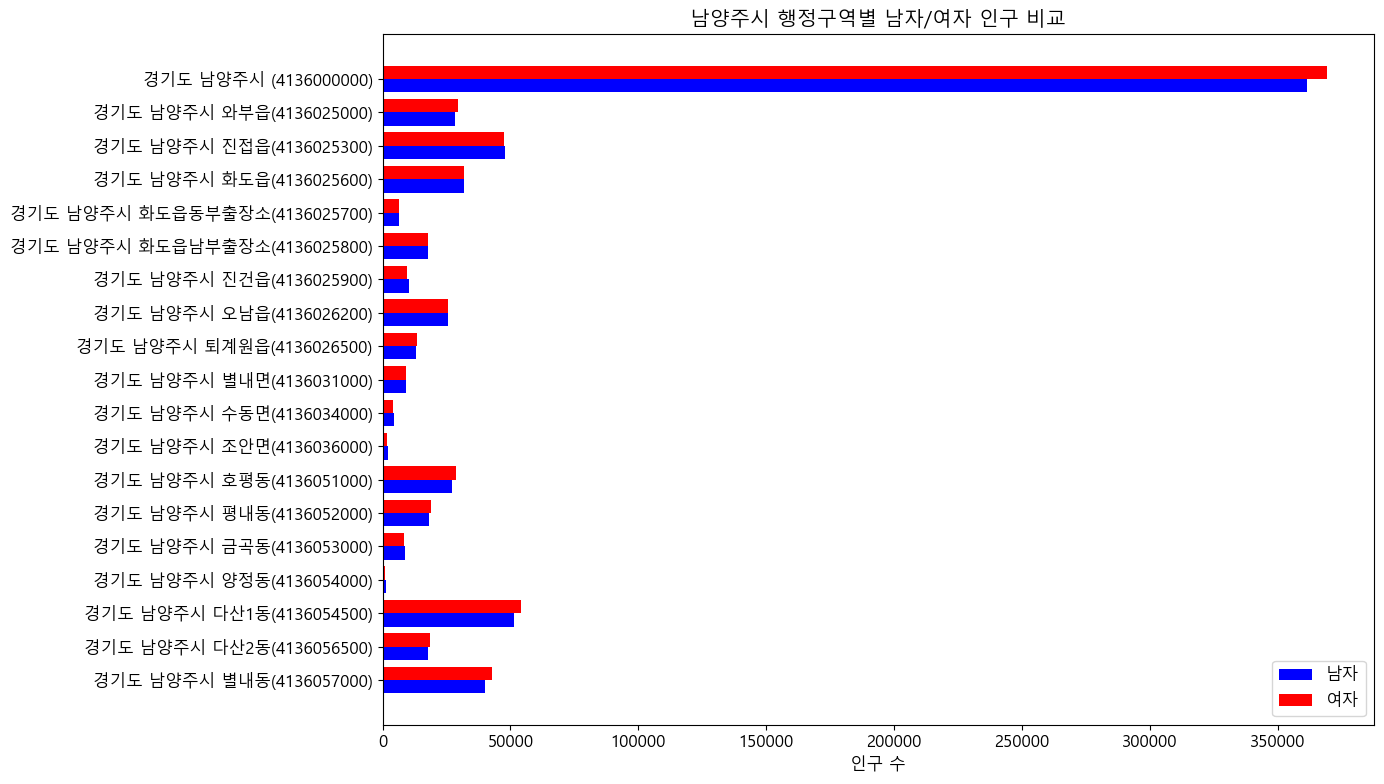

In [6]:
pop_2['남자 인구수'] = pop_2['남자 인구수'].str.replace(',', '').astype(int)
pop_2['여자 인구수'] = pop_2['여자 인구수'].str.replace(',', '').astype(int)

plt.figure(figsize=(14, 8))
bar_width = 0.4
index = range(len(pop_2))

plt.barh([i + bar_width for i in index], pop_2['남자 인구수'], bar_width, label='남자', color='blue')
plt.barh(index, pop_2['여자 인구수'], bar_width, label='여자', color='red')

plt.yticks([i + bar_width / 2 for i in index], pop_2['행정구역'])
plt.xlabel('인구 수')
plt.title('남양주시 행정구역별 남자/여자 인구 비교')
plt.legend()
plt.tight_layout()
plt.gca().invert_yaxis()
plt.show()

In [9]:
행정구역 = [
    '남양주시', '와부읍', '진접읍', '화도읍', '화도읍동부출장소', '화도읍남부출장소',
    '진건읍', '오남읍', '퇴계원읍', '별내면', '수동면', '조안면',
    '호평동', '평내동', '금곡동', '양정동', '다산1동', '다산2동', '별내동'
]

인구수 = [
    730717, 57980, 95246, 63618, 12964, 35509, 20058, 
    50965, 26742, 18013, 8500, 3759, 55616, 37385, 17253, 
    2318, 105555, 36395, 82841
]


위도 = [
    37.6360, 37.5869, 37.7150, 37.6797, 37.6797, 37.6797,
    37.6526, 37.6770, 37.6517, 37.7080, 37.7191, 37.5890,
    37.6540, 37.6459, 37.6526, 37.6526, 37.5992, 37.5992, 37.7080
]

경도 = [
    127.2165, 127.2303, 127.1900, 127.2712, 127.2712, 127.2712,
    127.3075, 127.2596, 127.1426, 127.1155, 127.3143, 127.2780,
    127.2450, 127.2357, 127.3075, 127.3075, 127.1754, 127.1754, 127.1155
]

df = pd.DataFrame({
    '행정구역': 행정구역,
    '인구수': 인구수,
    '위도': 위도,
    '경도': 경도
})


m = folium.Map(location=[37.6360, 127.2165], zoom_start=11)

for _, row in df.iterrows():
    if pd.notna(row['위도']) and pd.notna(row['경도']):
        population_text = f"{row['인구수']:,}명" if row['인구수'] > 0 else "정보 없음" # 0명일 경우 다르게 표시 (선택사항)
        popup = f"<b>{row['행정구역']}</b><br>인구수: {population_text}"
        if row['인구수'] >= 200000:
            color = 'orange' 
        elif row['인구수'] >= 25000:
            color = 'red'
        else:
            color = 'blue'
        
        folium.Marker(
            location=[row['위도'], row['경도']],
            popup=popup,
            tooltip=row['행정구역'],
            icon=folium.Icon(color=color, icon='info-sign')
        ).add_to(m)

#m.save("yangju_population_map.html")
m


In [10]:
pop_3 = pd.read_csv("datas/population_change_N.csv", encoding="cp949")
pop_3

,행정구역,2017년_총인구수,2017년_세대수,2017년_세대당 인구,2017년_남자 인구수,2017년_여자 인구수,2017년_남여 비율,2018년_총인구수,2018년_세대수,2018년_세대당 인구,...,2023년_세대당 인구,2023년_남자 인구수,2023년_여자 인구수,2023년_남여 비율,2024년_총인구수,2024년_세대수,2024년_세대당 인구,2024년_남자 인구수,2024년_여자 인구수,2024년_남여 비율
0,경기도 경기도 남양주시 (4136000000),"665,321","255,594",2.60,"332,152","333,169",1.00,"681,828","264,488",2.58,...,2.40,"363,190","369,075",0.98,"732,482","307,424",2.38,"362,652","369,830",0.98
1,경기도 남양주시 와부읍(4136025000),"68,546","25,027",2.74,"33,828","34,718",0.97,"66,534","24,579",2.71,...,2.56,"28,309","29,277",0.97,"58,146","22,891",2.54,"28,532","29,614",0.96
2,경기도 남양주시 진접읍(4136025300),"95,719","35,675",2.68,"48,369","47,350",1.02,"94,738","36,059",2.63,...,2.42,"48,273","47,737",1.01,"95,374","39,787",2.40,"47,932","47,442",1.01
3,경기도 남양주시 화도읍(4136025600),"94,788","37,353",2.54,"47,621","47,167",1.01,"97,970","38,959",2.51,...,2.26,"32,216","32,497",0.99,"63,839","28,517",2.24,"31,804","32,035",0.99
4,경기도 남양주시 화도읍동부출장소(4136025700),"12,968","5,518",2.35,"6,653","6,315",1.05,"13,230","5,594",2.37,...,2.36,"6,813","6,720",1.01,"13,092","5,600",2.34,"6,585","6,507",1.01
5,경기도 남양주시 화도읍남부출장소(4136025800),0,0,0.00,0,0,0.00,NaN,NaN,NaN,...,2.49,"17,956","17,922",1.00,"35,587","14,499",2.45,"17,791","17,796",1.00
6,경기도 남양주시 진건읍(4136025900),"26,707","11,257",2.37,"13,847","12,860",1.08,"25,845","11,209",2.31,...,2.12,"10,887","10,092",1.08,"20,236","9,702",2.09,"10,456","9,780",1.07
7,경기도 남양주시 오남읍(4136026200),"54,937","20,548",2.67,"27,497","27,440",1.00,"54,396","20,812",2.61,...,2.38,"25,897","25,832",1.00,"51,163","21,721",2.36,"25,523","25,640",1.00
8,경기도 남양주시 퇴계원읍(4136026500),0,0,0.00,0,0,0.00,NaN,NaN,NaN,...,2.36,"13,637","13,824",0.99,"26,960","11,536",2.34,"13,341","13,619",0.98
9,경기도 남양주시 별내면(4136031000),"20,798","8,267",2.52,"10,392","10,406",1.00,"20,583","8,368",2.46,...,2.24,"9,238","9,267",1.00,"18,115","8,139",2.23,"9,053","9,062",1.00


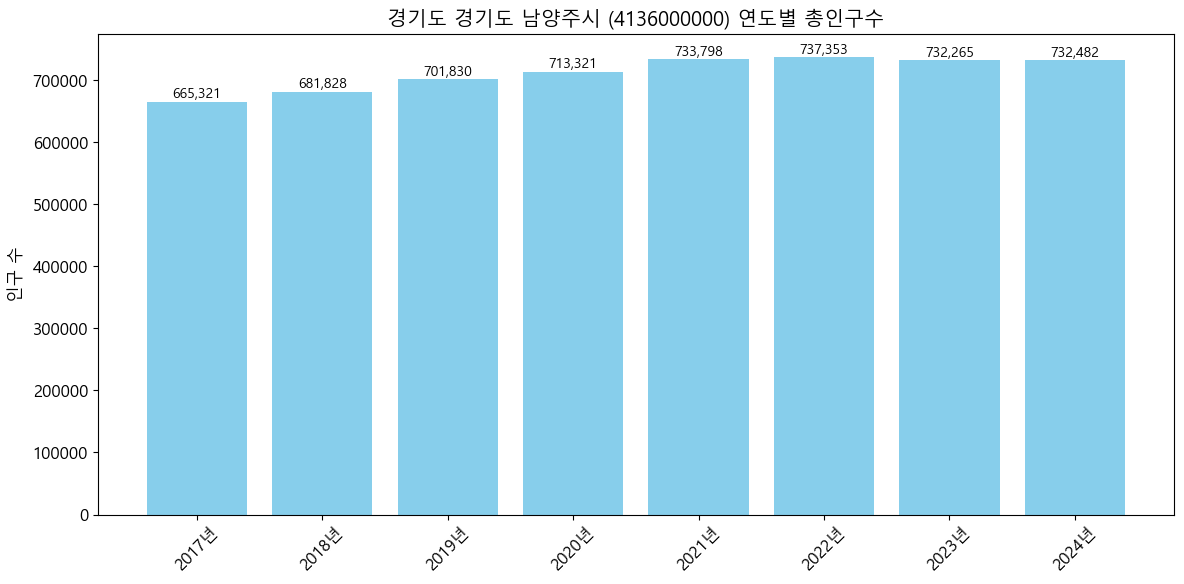

In [12]:
total_pop_cols = [col for col in pop_3.columns if "총인구수" in col
]
age_values = pop_3.loc[0, total_pop_cols].apply(lambda x: int(str(x).replace(',', '')) if isinstance(x, str) else x)

age_cols = [col.replace("_총인구수", "") for col in total_pop_cols]

plt.figure(figsize=(12, 6))
bars = plt.bar(age_cols, age_values, color='skyblue')

for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height + 1000,
        f'{height:,}',
        ha='center', va='bottom', fontsize=10
    )

plt.xticks(rotation=45)
plt.title(f"{pop_3.iloc[0, 0]} 연도별 총인구수")
plt.ylabel("인구 수")
plt.tight_layout()
plt.show()